In [13]:
# Imports
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

## Regression Analysis
---

In [14]:
# Read in Yen.csv and preview
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2,1
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1


In [15]:
# Trim dataset starting Jan 1st 1990 and preview
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head() 

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336,51473
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206,53860
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649,55699
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944,53111
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763,52072


In [17]:
# Create a series using "Settle" price percentage returns and preview
yen_futures["Return"] = yen_futures["Settle"].pct_change() * 100
yen_futures.dropna()
yen_futures.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return
Date,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153,145470,-0.410601
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397,144474,-0.369458
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810,147471,-0.564304
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457,153902,0.151335
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342,151564,-0.469509


In [18]:
# Create a lagged return using shift function and preview
yen_futures['Lagged_Return'] = yen_futures['Return'].shift()
yen_futures.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153,145470,-0.410601,0.170931
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397,144474,-0.369458,-0.410601
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810,147471,-0.564304,-0.369458
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457,153902,0.151335,-0.564304
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342,151564,-0.469509,0.151335


In [32]:
# Create a train/test split for 2018-2019 for testing and 02-019-2014 till 2019 data for training
train = yen_futures['02-19-2014':'2018']
test = yen_futures['2018':'2019']

In [33]:
# Create four dataframes:
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

In [34]:
# Preview X_train
X_train

,Lagged_Return
Date,
2014-02-19,-0.427829
2014-02-20,-0.020460
2014-02-21,0.020465
2014-02-24,-0.204604
2014-02-25,0.020502
...,...
2018-12-24,-0.187545
2018-12-26,0.834485
2018-12-27,-0.893346


## Linear Regression Model
---

In [35]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Make Predictions using the Testing Data
---

In [36]:
# Make a prediction of "y" values
predictions = model.predict(X_test)

In [37]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Return"] = predictions

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0a3a88350>,
      dtype=object)

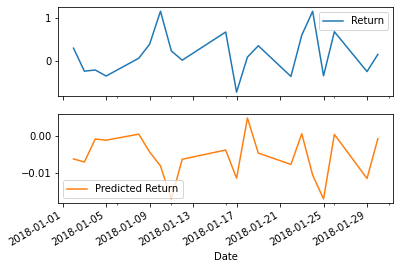

In [38]:
# Plot the first 20 predictions vs the true values
Results[:20].plot(subplots=True)

## Out-of-Sample Performance
---

In [40]:
# imports
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse = mean_squared_error(
    Results["Return"],
    Results["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE) and print the results:
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.4138080752800209


## In-Sample Performance
---

In [42]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample) and print the results:
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.5640119334937695


## Conclusion
---

### Does this model perform better or worse on out-of-sample data compared to in-sample data?

The out-of-sample data performs better than the in-sample data. We can come to this conclusion via the lower RMSE. A lower RMSE typically indicates a better fit.